###  Order of faces using ISOMAP


The objective of this question is to reproduce the ISOMAP algorithm results that we have seen discussed in lecture as an excercise. The file \textsf{isomap.mat} (or \textsf{isomap.dat}) contains 698 images, corresponding to different poses of the same face. Each image is given as a 64 $\times$ 64 luminosity map, hence represented as a vector in $\mathbb R^{4096}$. This vector is stored as a row in the file. [This is one of the datasets used in the original paper for ISOMAP, J.B. Tenenbaum, V. de Silva, and J.C. Langford, Science 290 (2000) 2319-2323.]

#### a) Before the advent of many topics on manifold learning, PCA was assumed to be a powerful tool in reducing the dimensions of features in the dataset. Can you identify as many cases in which you may find it difficult to apply the dimension technique as you can? what is the general mechanism lying in the construction of manifold learnings?

## <span style="color:red">Answer</span>


<div>
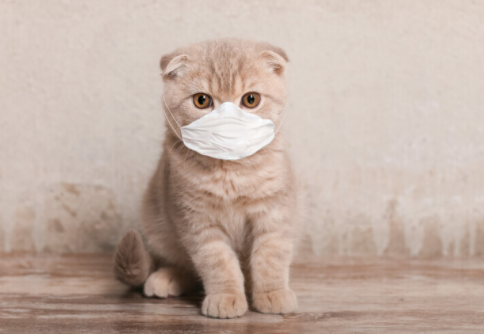
</div>


### <span style="color:blue"> Part 1) Need For Manifold Learning</span>

PCA is based primarily on the mechanism that the newly generated component is a  linear combination of all the input features in our dataset and we take them up to a specific number according to the size of variation it has. Looking at the definition carefully, you will notice that it makes one major assumption that the data can be modeled linearly. Due to this nature, its dimension reduction would be superior in some datasets that line up with the presupposition. Otherwise, it would get easily flustered on the different structures of data. 

To put things in context, we prepare 400 by 400 pixels headshots of your lovely cat.  Under the most favorable situation, each of the images would be centered perfectly. But  this naive notion would not work out in that
there are factors or degree of freedom to consider including the light intensity, posture, the tilt of the face, even messy hair by the wind even if the object does not change at all. 

On top of that, many research papers propose that its performance level would noticeably deteriorate when the distribution of data is highly asymmetrical. Overall, there is a need for a generalizable method of dimensionality reduction.


### <span style="color:blue"> Part 2) Mechanism underneath ISOMAP</span>

<div>
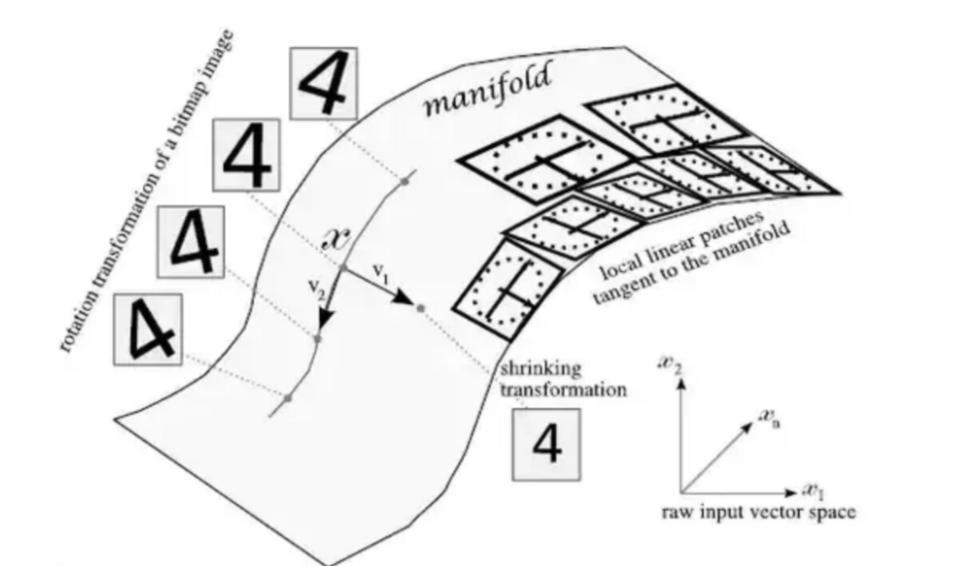
</div>

Recall that PCA creates several linear hyperplanes to represent dimensions. But manifold learning struggle with learning manifolds, which are smooth curved surfaces within the multidimensional space. One unique feature by which we can tell it from the general linear dimension reduction is local linear patches are not subject to mathematical function but is to be modeled by several small linear patches. Here are a few assumptions or aspects of manifold learning algorithms. 

- The nonlinear relationship presents in the dataset can be modeled through continuous manifolds.

- The multi-dimension shape of data mainly needs preserving.
The learnings do not require 'flattening' or 'projecting' the data to a specific direction but performing more complex manipulation such as unfolding a coiled strip or flipping a share inside out is still permissible. 

- A majority of manifold learning is a 'by-product' of a network graph in that the curved surface is composed of several neighbors to maintain the distance between one point and its neighbor as small as possible.  Not all distance measure is used for indicating the shortest path but must consider the geometric relationship in the data. 


##### b) Choose the Euclidean distance between images (i.e., in this case a distance in $\mathbb R^{4096}$). Construct a similarity graph with vertices corresponding to the images, and tune the threshold $\epsilon$ so that each node has at least 100 neighbors. Visualize the similarity graph (e.g., plot the adjacency matrix, or visualize the graph and illustrate a few images corresponds to nodes at different parts of the graph; you can be a bit creative here).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import coo_matrix
from scipy.spatial.distance import cdist
from sklearn.utils.graph import graph_shortest_path
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from IPython.core.display import display, HTML
import warnings
import scipy.io

from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from sklearn.utils.graph import graph_shortest_path

In [71]:
isomap=scipy.io.loadmat(r"C:\Users\sd4be\Downloads\isomap.mat")
display(isomap)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Sep 11 16:44:56 2019',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
         0.01617647],
        [0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
         0.01617647],
        [0.01617647, 0.01617647, 0.01617647, ..., 0.01617647, 0.01617647,
         0.01617647],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])}

In [72]:
df = pd.DataFrame(isomap['images']).T

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

# Rotate the pictures
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
# Show first 5 rows
print(df.head())

       0         1         2         3         4         5         6     \
0  0.016176  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.016176  0.000000  0.000000  0.000000  0.007062  0.056710  0.192279   
2  0.016176  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.016176  0.110754  0.384988  0.510034  0.608609  0.743229  0.735126   
4  0.016176  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       7         8         9     ...      4086  4087  4088  4089  4090  4091  \
0  0.000000  0.000000  0.000000  ...  0.000781   0.0   0.0   0.0   0.0   0.0   
1  0.380607  0.504733  0.514920  ...  0.000000   0.0   0.0   0.0   0.0   0.0   
2  0.000000  0.000000  0.000000  ...  0.000000   0.0   0.0   0.0   0.0   0.0   
3  0.664675  0.774494  0.792233  ...  0.000000   0.0   0.0   0.0   0.0   0.0   
4  0.000000  0.000000  0.000000  ...  0.000000   0.0   0.0   0.0   0.0   0.0   

   4092  4093  4094  4095  
0   0.0   0.0   0.0   0.0  
1   0.0   0.

In [73]:
m,n=images.shape

In [79]:
def my_isomap(data, num_neighbors, distance, dim=2):
    
    '''
    Isomap
    
    Input:
    data = (m,n) dimensional array with the rows as datapoints and the columns as features
    num_neighbors = (int) number of neighbors for the construction of the similarity graph
    distance = (str) the distance metric used to compute the pairwise distances between the datapoints
    dim = (int) the dimensions of the embeddding
    
    Output:
    A = (m,m) dimensional array containing with pairwise distances for the neigboring points and 0s otherwise
    Z = (m,dim) dimensional array containing the leading eigenvectors as returned by the isomap algorithm
    
    '''
    from scipy.spatial.distance import cdist
    import numpy as np
    import pandas as pd
    from sklearn.utils.graph import graph_shortest_path
    
    m,n = data.shape
    
    # Compute the pairwise distance between images:
    distances = cdist(XA=data, XB=data, metric=distance)
    
    # Compute the nearest neighbors graph A based on the specified number of neighbors:
    A = np.zeros_like(distances)
    for i in range(distances.shape[0]):
        neighbors = np.argsort(distances[i,:])[:num_neighbors+1]
        A[i,neighbors] = distances[i,neighbors]
        A[neighbors,i] = distances[neighbors,i]
        
    # Compute the shortest path graph D based on the nearest neighbors graph A:
    D = graph_shortest_path(A)
    
    # Compute the centering matrix H:
    I = np.eye(N=D.shape[1])
    H = I - 1/m * np.ones(I.shape)
    
    # Compute the C matrix:
    C = -1/(2*m) * H @ D**2 @ H
    
    # Compute the eigenvalues and eigenvectors of C and sort them in descending order:
    vals, vecs = np.linalg.eigh(C)
    sorted_vals = vals[np.argsort(-vals)]
    sorted_vecs = vecs[:,np.argsort(-vals)]
    
    # Normalize the leading eigenvectors:
    Z = sorted_vecs[:,:dim] * np.sqrt(sorted_vals[:dim])
    
    return A,Z

In [75]:
manifold_2Da = my_isomap(images,num_neighbors=100,distance='euclidean',dim=2)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

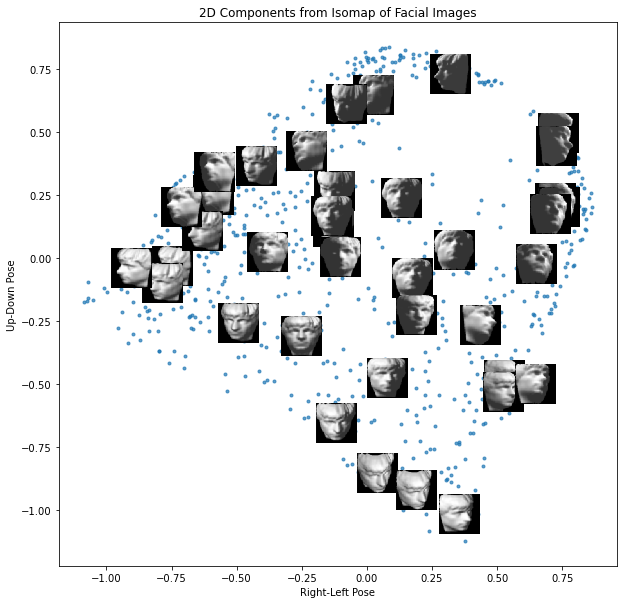

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [77]:
manifold_2Da = my_isomap(images,num_neighbors=100,distance='cityblock',dim=2)


c. (10 points) Now choose $\ell_1$ distance (or Manhattan distance) between images (recall the definition from "Clustering" lecture)). Repeat the steps above. Again construct a similarity graph with vertices corresponding to the images, and tune the threshold $\epsilon$ so that each node has at least 100 neighbors. Implement the ISOMAP algorithm and apply it to this graph to obtain a $d$ = 2-dimensional embedding. Present a plot of this embedding. Do you see any difference by choosing a different similarity measure?

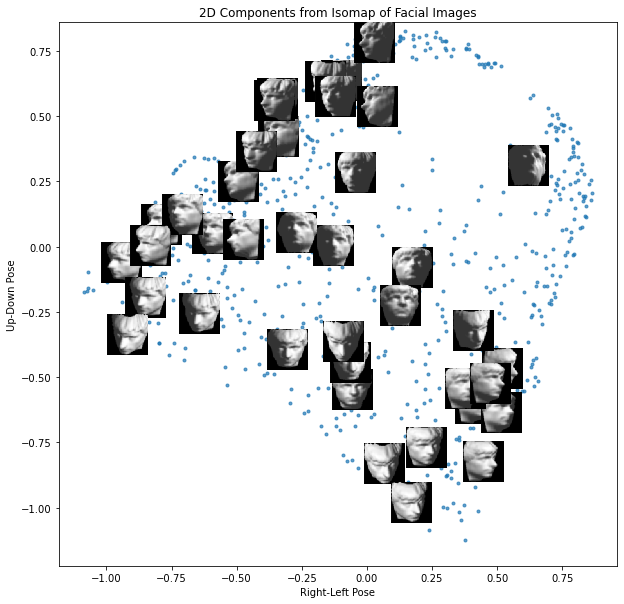

In [78]:
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()